<a href="https://colab.research.google.com/github/mohadi21/Projet-Business-Intelligence/blob/main/BI_DBLP_Subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


# **Projet : Business Intelligence**

Mohamed Abdelhadi BOUDJEMAI

fichier DBLP_Subset.tx

# PARTIE 1:TRAITEMENT DES DONNEES ET CONSTRUCTION DES MATRICES

In [ ]:
#lecture du fichier TXT 
with open('/content/DBLP_Subset.txt') as r:
       lines = r.readlines()

In [ ]:
compt = 0
for line in lines:
  line = line.strip()
  if line == '#@':
    compt=compt+1
compt

414

In [ ]:
len(lines)

467758

le code  ci-dessous pour le remplissage de notre dataframe 
on lit ligne par ligne et on fait remplissage grace les caractères spéciaux. notre séparateur puour chaques article est "\n" .

In [ ]:
data = pd.DataFrame(columns = ['Venue', 'Year', 'authers', 'Titre', 'NbrAuther','id', 'ListCitation','NbrCitation','Abstract'])
annee = ""
venue = ""
auteur = []
au=""
nbrauteur = 0
citation = []
ci=""
nbrcitation = 0
titre = ""
resume = ""
id=""
ligne_ajou = ""
for line in lines :
  if line == '\n':
    
    nbrauteur = len(auteur)
    nbrcitation = len(citation)
    au=",".join(auteur)
    ci=",".join(citation)
    if auteur == [] or auteur == [""]:
      au = None
    if annee == '':
      annee = None
    if citation == [] or citation == [""]:
      ci = None
    if titre == '':
      titre = None
    if id == '':
      id = None
    if resume == '':
      resume = None
    if venue == '':
      venue = None
      
    col = [[venue,annee,au,titre,nbrauteur,id,ci,nbrcitation,resume]]
    df = pd.DataFrame(col, columns = ['Venue', 'Year', 'authers', 'Titre', 'NbrAuther','id', 'ListCitation','NbrCitation','Abstract'])
    data = data.append(df, ignore_index=True)  
    auteur = []
    au=""
    citation = []
    ci=""
    resume = ""
    ligne_ajou = ""
    
  line = line.strip()
  if line.startswith( '#*' ):
    titre = line[2:]
  elif line.startswith( '#@' ):
     ligne_ajou = 'a'
     auteur.append(line[2:])
  elif line.startswith( '#t' ):
    annee = line[2:]
  elif line.startswith( '#c' ):
    venue = line[2:]
  elif line.startswith( '#index' ):
    id = line[6:]
  elif line.startswith( '#%' ):
    citation.append(line[2:])
  elif line.startswith( '#!' ):
    ligne_ajou = 'b'
    resume = resume + ' ' + line[2:]

  elif ligne_ajou == 'a':
    auteur.append(line[2:])
  elif ligne_ajou == 'b':
    resume = resume + ' ' + line 


In [ ]:
data
#data.to_csv(r'data.csv', index=False, header=True)

,Venue,Year,authers,Titre,NbrAuther,id,ListCitation,NbrCitation,Abstract
0,DAC,1988,"Chung-Kuan Cheng,vid N. Deutsch",Improved Channel Routing by Via Minimization a...,2,131751,"133716,133521,134343",3,Channel routing area improvement by means of ...
1,DAC,2006,"Lei Cheng,ang Deng,ming Chen,rtin D. F. Wong",A fast simultaneous input vector generation an...,4,131752,"132550,530568,436486,134259,283007,134422,2821...",8,Input vector control (IVC) technique is based...
2,DAC,1992,"Kwang-Ting Cheng,-Keung Tony Ma",On the Over-Specification Problem in Sequentia...,2,131756,"455537,1078626,131745",3,The authors show that some ATPG (automatic te...
3,DAC,2005,"Lerong Cheng,oebe Wong,i Li,n Lin,i He",Device and architecture co-optimization for FP...,5,131759,"214244,215701,214503,282575,214411,214505,132929",7,Device optimization considering supply voltag...
4,DAC,1989,"Wu-Tung Cheng,ng-Lin Yu",Differential Fault Simulation - a Fast Method ...,2,131760,"131744,806030",2,A new fast fault simulator called differentia...
...,...,...,...,...,...,...,...,...,...
37961,Journal of Systems and Software,2010,Magne Jørgensen,Selection of strategies in judgment-based effo...,1,1600529,"996865,601059,361510,492786,997634,1128515,107...",13,We currently know little about the factors th...
37962,Journal of Systems and Software,2010,"Abbas Nayebi,mid Sarbazi-Azad,nnar Karlsson",Performance analysis of opportunistic broadcas...,3,1600531,"505564,1114157,412964,588689,53668,692884,1247511",7,This paper investigates a class of mobile wir...
37963,Journal of Systems and Software,2010,"Rossella Fortuna,igi Alfredo Grieco,nnaro Bogg...",Quality adaptive end-to-end packet scheduling ...,4,1600532,"396959,794228,588835,997951",4,In Internet multimedia streaming the quality ...
37964,Journal of Systems and Software,2010,"Richard Werner Nelem Pazzi,enxia Zhang,zedine ...",Design and evaluation of a novel MAC layer han...,3,1600537,"666821,784037,506991,505779,1247751",5,In recent years the IEEE 802.11 wireless netw...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37966 entries, 0 to 37965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Venue         37964 non-null  object
 1   Year          37966 non-null  object
 2   authers       37549 non-null  object
 3   Titre         37966 non-null  object
 4   NbrAuther     37966 non-null  object
 5   id            37966 non-null  object
 6   ListCitation  18746 non-null  object
 7   NbrCitation   37966 non-null  object
 8   Abstract      20557 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


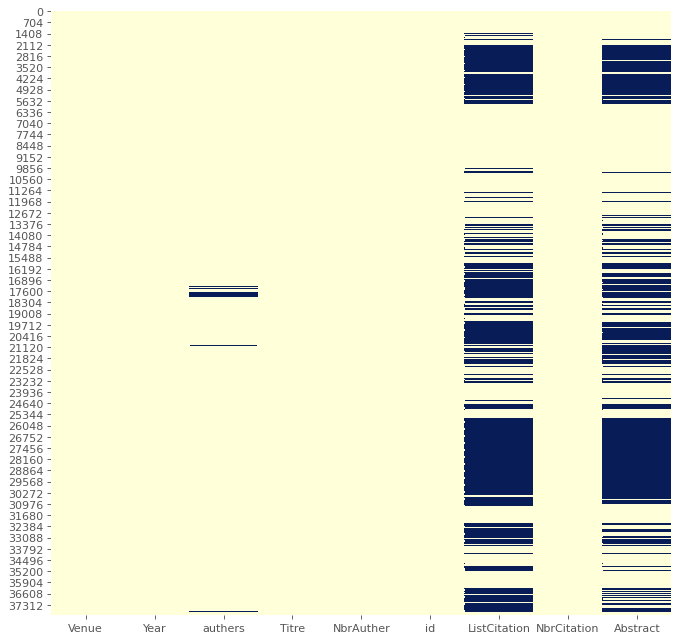

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [ ]:
Total=data.isnull().sum().sort_values(ascending=False)
Percent=round(Total/len(data)*100,2)
pd.concat([Total,Percent],axis=1,keys=['Total','Percent'])
#citation, resume et la colonne auteurs ont des données manquantes

,Total,Percent
ListCitation,19220,50.62
Abstract,17409,45.85
authers,417,1.10
Venue,2,0.01
NbrCitation,0,0.00
id,0,0.00
NbrAuther,0,0.00
Titre,0,0.00
Year,0,0.00


In [ ]:
data.describe()


,Venue,Year,authers,Titre,NbrAuther,id,ListCitation,NbrCitation,Abstract
count,37964,37966,37549,37966,37966,37966,18746,37966,20557
unique,283,75,32657,36923,18,37963,18350,67,20525
top,J. Symb. Log.,2009,[David B. Lomet],Preface.,1,132139,[86],0,This paper presents the findings of a five-ye...
freq,3402,4866,75,123,27178,3,18,19220,3


In [ ]:
print(data.shape)
print(data.columns.values)

(37966, 9)
['Venue' 'Year' 'authers' 'Titre' 'NbrAuther' 'id' 'ListCitation'
 'NbrCitation' 'Abstract']


Construction des matrices Documents-termes pour les titres des articles ainsi que pour les résumés


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import wordcloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
plt.style.use('classic')
bow = CountVectorizer(max_features=2500, lowercase=True, ngram_range=(1,1), analyzer="word")
bow_title = CountVectorizer(max_features=1500, lowercase=True, ngram_range=(1,1), analyzer="word")
stop = stopwords.words('english') + stopwords.words('french') +["présentons", "présente", "résultats","comme","dune", 'dun', 'afin','entre', 'article','ainsi','partir', 'plus','très', 'approche','méthodes', 'méthode','données', 'proposons','permet' ,'deux']

stop = np.unique(stop).tolist()
print ((stop))

['a', 'about', 'above', 'afin', 'after', 'again', 'against', 'ai', 'aie', 'aient', 'aies', 'ain', 'ainsi', 'ait', 'all', 'am', 'an', 'and', 'any', 'approche', 'are', 'aren', "aren't", 'article', 'as', 'at', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'c', 'can', 'ce', 'ces', 'comme', 'couldn', "couldn't", 'd', 'dans', 'de', 'des', 'deux', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'données', 'down', 'du', 'dun', 'dune', 'during', 'each', 'elle', 'en', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'few', 'for', 'from', 'furent', 'further', 'fus', 'fu

In [ ]:
data=data.dropna(subset=['Titre'])
data['Titre']=data['Titre'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data['Titre']=data['Titre'].str.replace('[^\w\s]',' ')
data['Titre']=data['Titre'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
data['Titre'] = data['Titre'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(data['Titre'])

0        improved channel routing via minimization shif...
1        fast simultaneous input vector generation gate...
2          specification problem sequential atpg algorithm
3        device architecture co optimization fpga power...
4        differential fault simulation fast method usin...
                               ...                        
37961    selection strategy judgment based effort estim...
37962    performance analysis opportunistic broadcast d...
37963    quality adaptive end end packet scheduling avo...
37964    design evaluation novel mac layer handoff prot...
37965    glbm new qos aware multicast scheme wireless m...
Name: Titre, Length: 37966, dtype: object


In [ ]:
m=bow_title.fit_transform(data['Titre'])
m=m.todense()
title_words=np.asarray(bow_title.get_feature_names())
print(m.shape)
print(bow.get_feature_names)


(37966, 1500)
<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>


In [ ]:
data=data.dropna(subset=['Abstract'])
data['Abstract']=data['Abstract'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data['Abstract']=data['Abstract'].str.replace('[^\w\s]',' ')
data['Abstract']=data['Abstract'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
data['Abstract'] = data['Abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(data['Abstract'])

0        channel routing area improvement mean via mini...
1        input vector control ivc technique based obser...
2        author show atpg automatic test pattern genera...
3        device optimization considering supply voltage...
4        new fast fault simulator called differential f...
                               ...                        
37961    currently know little factor motivate selectio...
37962    paper investigates class mobile wireless senso...
37963    internet multimedia streaming quality delivere...
37964    recent year ieee 802 11 wireless network famil...
37965    wireless mesh network wmns attracting signific...
Name: Abstract, Length: 20557, dtype: object


In [ ]:
m2=bow.fit_transform(data['Abstract'])
m2=m2.todense()
abstract_words=np.asarray(bow.get_feature_names())
print(m2.shape)
print(bow.get_feature_names)

(20557, 2500)
<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>


In [ ]:
b = np.array([i for i in range(m.shape[0])])
doc_term_tit = np.c_[b,m]
doc_term_tit
#pd.DataFrame(doc_term_tit).to_csv(r'd_t_titre.csv', index=False, header=True)

matrix([[    0,     0,     0, ...,     0,     0,     0],
        [    1,     0,     0, ...,     0,     0,     0],
        [    2,     0,     0, ...,     0,     0,     0],
        ...,
        [37963,     0,     0, ...,     0,     0,     0],
        [37964,     0,     1, ...,     0,     0,     0],
        [37965,     0,     0, ...,     0,     0,     0]])

In [ ]:
d = np.array([i for i in range(m2.shape[0])])
doc_term_ab = np.c_[d,m2]
doc_term_ab
#pd.DataFrame(doc_term_ab).to_csv(r'd_t_abstact.csv', index=False, header=True)

matrix([[    0,     0,     0, ...,     0,     0,     0],
        [    1,     0,     0, ...,     0,     0,     0],
        [    2,     0,     0, ...,     0,     0,     0],
        ...,
        [20554,     0,     0, ...,     0,     0,     0],
        [20555,     0,     0, ...,     0,     0,     0],
        [20556,     0,     0, ...,     0,     0,     0]])

In [ ]:
data=data.dropna(subset=['Titre'])
data=data.dropna(subset=['Abstract'])
data['titre_res']=data['Abstract']+" "+data['Titre']
data['titre_res']=data['titre_res'].apply(lambda x:" ".join(x.lower() for x in x.split()))
data['titre_res']=data['titre_res'].str.replace('[^\w\s]',' ')
data['titre_res']=data['titre_res'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
data['titre_res'] = data['titre_res'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(data['titre_res'])


0        channel routing area improvement mean via mini...
1        input vector control ivc technique based obser...
2        author show atpg automatic test pattern genera...
3        device optimization considering supply voltage...
4        new fast fault simulator called differential f...
                               ...                        
37961    currently know little factor motivate selectio...
37962    paper investigates class mobile wireless senso...
37963    internet multimedia streaming quality delivere...
37964    recent year ieee 802 11 wireless network famil...
37965    wireless mesh network wmns attracting signific...
Name: titre_res, Length: 20557, dtype: object


In [ ]:
m3=bow.fit_transform(data['titre_res'])
m3=m3.todense()
tit_abs_words=np.asarray(bow.get_feature_names())
print(m3.shape)
print(bow.get_feature_names)

(20557, 2500)
<bound method CountVectorizer.get_feature_names of CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)>


In [ ]:
ddd = np.array([i for i in range(m3.shape[0])])
doc_term_tit_ab = np.c_[ddd,m3]
doc_term_tit_ab
#pd.DataFrame(doc_term_tit_ab).to_csv(r'd_t_tit_abs.csv', index=False, header=True)

matrix([[    0,     0,     0, ...,     0,     0,     0],
        [    1,     0,     0, ...,     0,     0,     0],
        [    2,     0,     0, ...,     0,     0,     0],
        ...,
        [20554,     0,     0, ...,     0,     0,     0],
        [20555,     0,     0, ...,     0,     0,     0],
        [20556,     0,     0, ...,     0,     0,     0]])

In [ ]:
def splitauthor(authors):
  temp = authors.lower()
  splitted_authors = []
  for author in temp.split(","):
    splitted_authors.append(author.strip())
  return splitted_authors


In [ ]:
data=data.dropna(subset=['authers'])
data["splitted_authors"] = data["authers"].apply(splitauthor)
auteurs = []
for index, row in data.iterrows():
  for author in row["splitted_authors"]:
    if author not in auteurs:
      auteurs.append(author)
auteurs
len(auteurs)

37316

In [ ]:
id_auteurs = pd.DataFrame({'auteurs':auteurs})
id_auteurs["id_auteurs"] = id_auteurs.index
#id_auteurs.to_csv(r'id_auteurs.csv', index=False, header=True)
id_auteurs

,auteurs,id_auteurs
0,chung-kuan cheng,0
1,vid n. deutsch,1
2,lei cheng,2
3,ang deng,3
4,ming chen,4
...,...,...
37311,etro camarda,37311
37312,richard werner nelem pazzi,37312
37313,enxia zhang,37313
37314,liang zhao,37314


In [ ]:
#Matrice doc_authors
doc_auteurs=np.zeros((len(data), len(auteurs)), dtype=int)
author_map = {x:i for i,x in enumerate(auteurs)}

for index, row in data.reset_index().iterrows():
  for author in row["splitted_authors"]:
    doc_auteurs[index, author_map[author]] = 1 



In [ ]:
#pd.DataFrame(doc_auteurs).to_csv(r'doc_auteurs.csv', index=False, header=True)
doc_auteurs

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

In [ ]:
data=data.dropna(subset=['ListCitation'])
data["splitted_Citation"] = data["ListCitation"].apply(splitauthor)
citations = []
for index, row in data.iterrows():
  for c in row["splitted_Citation"]:
    if c not in citations:
      citations.append(author)
citations
len(citations)

126890

In [ ]:
mat_adj_auteurs= doc_auteurs.dot(doc_auteurs.transpose())
mat_adj_auteurs.shape

(20552, 20552)

In [ ]:
import numpy as np
#matrices d'adjacence
m = np.transpose(doc_term_tit)
mat_adj_titre=np.dot(doc_term_tit,m)
print(mat_adj_titre)
print(mat_adj_titre.shape)

In [ ]:
#matrices d'adjacence
m = np.transpose(doc_term_ab)
mat_adj_abstract=np.dot(doc_term_ab,m)
print(mat_adj_abstract)
print(mat_adj_abstract.shape)

In [ ]:
pip install python-louvain

In [ ]:
pip install cluster_ensembles

     |████████████████████████████████| 5.3MB 3.6MB/s 
  Created wheel for cluster-ensembles: filename=Cluster_Ensembles-1.16-cp36-none-any.whl size=5331377 sha256=0866b29361d572c113155ddae567d3ad514cc5c105276f46e4986419e8373e5b
  Stored in directory: /root/.cache/pip/wheels/3f/fb/2b/60b8a4ab88c9327943ad194237635f071c64dc11f36e86b3fd
Successfully built cluster-ensembles


In [ ]:
!sudo apt-get install metis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmetis5
The following NEW packages will be installed:
  libmetis5 metis
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 209 kB of archives.
After this operation, 698 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmetis5 amd64 5.1.0.dfsg-5 [169 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 metis amd64 5.1.0.dfsg-5 [39.8 kB]
Fetched 209 kB in 2s (129 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to fro

In [ ]:
!pip list -v

Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr/local/lib/python3.6/dist-packages pip      
astunparse                    1.6.3           /usr

In [ ]:
from random import choice
import random
random.seed(10)
################################################################# 
# Detection de communautés: application de l'algorithme de Louvain 
g_doc_term = nx.from_numpy_matrix(mat_adj_abstract)
g_tit_term = nx.from_numpy_matrix(mat_adj_titre)
g_doc_auth = nx.from_numpy_array(mat_adj_auteurs)

partition_doc_term = community.best_partition(g_doc_term) 
partition_tit_term = community.best_partition(g_tit_term)
partition_doc_auth = community.best_partition(g_doc_auth)


print("partition doc term", partition_doc_term) 
print("partition title term", partition_tit_term) 
print("partition doc author", partition_doc_auth) 

# Calcul de la modularité liée à cette parition 
modularity_value_doc_term = community.modularity(partition_doc_term, g_doc_term) 
modularity_value_tit_term = community.modularity(partition_tit_term, g_tit_term) 
modularity_value_doc_auth = community.modularity(partition_doc_auth, g_doc_auth)

print("modularity_value_doc_term", modularity_value_doc_term) 
print("modularity_value_tit_term", modularity_value_tit_term) 

print("modularity_value_doc_auth", modularity_value_doc_auth) 




cluster_runs [[0 1 1 2 0 2 1 0 2 1]
 [0 1 2 0 0 2 2 1 2 1]
 [2 0 0 2 1 1 1 0 1 2]]
*****
INFO: Cluster_Ensembles: CSPA: consensus clustering using CSPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_CSPA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_CSPA.part.3
#

INFO: Cluster_Ensembles: cluster_ensembles: CSPA at 0.4266836461093314.
*****

*****
INFO: Cluster_Ensembles: HGPA: consensus clustering using HGPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_HGPA.
INFO: Cluster_Ensembles: wgraph: 10 vertices and 9 non-zero hyper-edges.
#

#
INFO: Cluster_Ensembles: sgraph: calling shmetis for hypergraph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_HGPA.part.3
#

INFO: Cluster_Ensembles: cluster_ensembles: HGPA at 0.4615364034991947.
*****

*****
INFO: Cluster_Ensembles: MCLA: consensus clustering using MCLA.